The objective of the notebook is to clean the raw transactions an unique file with relevant information. 

In [1]:
import os
import pandas as pd 
import numpy as np 
import time
import matplotlib.pyplot as plt

In [6]:
# Marzo 2017 
path = '../../raw_data/2017_03_ValTroncal Mar2017'

In [7]:
#Relevant Columns
cols = ['Fecha de Transaccion','Emisor','Estacion',
       'Acceso de Estación', 'Dispositivo', 'Tipo de Tarjeta',
       'Nombre de Perfil', 'Numero de Tarjeta', 'Tipo de Tarifa',
       'Saldo Previo a Transaccion', 'Valor', 'Saldo Despues de Transaccion']

cols_1 = ['Fecha de Liquidación', 'Fecha de Uso', 'Emisor', 'Estación',
       'Acceso de Estación', 'Dispositivo', 'Tipo de Tarjeta',
       'Nombre de Perfil', 'Número de Tarjeta', 'Tipo de Tarifa',
       'Saldo Previo a Transacción', 'Valor', 'Saldo Después de Transacción']

In [108]:
#Relevant Columns
cols = ['Fecha de Transaccion','Emisor','Estacion',
       'Acceso de Estación', 'Dispositivo', 'Tipo de Tarjeta',
       'Nombre de Perfil', 'Numero de Tarjeta', 'Tipo de Tarifa',
       'Saldo Previo a Transaccion', 'Valor', 'Saldo Despues de Transaccion']

cols_1 = ['Fecha de Uso', 'Emisor', 'Estación',
       'Acceso de Estación', 'Dispositivo', 'Tipo de Tarjeta',
       'Nombre de Perfil', 'Número de Tarjeta', 'Tipo de Tarifa',
       'Saldo Previo a Transacción', 'Valor', 'Saldo Después de Transacción']

dfs = []
for i in os.listdir(path):
    try:
        df = pd.read_csv(os.path.join(path,i), delimiter = ";")
        fecha_transaction = df['Fecha de Transaccion'].astype(str)
        df['Fecha de Transaccion'] = pd.to_datetime(fecha_transaction, 
                                                    format= '%Y%m%d%H%M%S')
        dfs.append(df[cols])

    except IsADirectoryError:
        for j in os.listdir(os.path.join(path,i)):
            df = pd.read_csv(os.path.join(path, i,j), 
                             delimiter = ',')
            
            df = df[cols_1]
            df.columns = cols
            fecha_transaction = df['Fecha de Transaccion'].astype(str)
            df['Fecha de Transaccion'] = pd.to_datetime(fecha_transaction, 
                                                        format= '%d-%m-%Y %H:%M:%S')
            dfs.append(df)

In [279]:
big_df = pd.concat(dfs).reset_index(drop=True)

In [294]:
sample_size = 100000
a = big_df.iloc[:sample_size]

## What's the more convient data storage for the data

Evaluation takes into consideration: 
- saving_time: time to save a dataframe 
- reading_time: time to read a dataframe 
- file_size: size of the produced file 

In this experiment, three data format are selected: 
- Feather 
- Parquet 
- cvs

In [301]:
results = {}

sample_size = 100000
i = 80000
a = big_df.iloc[i:i + sample_size]

In [302]:
# Saving time
results['saving_time'] = {}
start = time.time()
a.reset_index(drop=True).to_feather('clean_trasactions.ftr')
end = time.time()
results['saving_time']['feather']= end - start

start = time.time()
a.reset_index(drop=True).to_parquet('clean_trasactions.parquet')
end = time.time()
results['saving_time']['parquet']= end - start

start = time.time()
a.reset_index(drop=True).to_csv('clean_trasactions.csv', index = False)
end = time.time()
results['saving_time']['csv']= end - start

In [303]:
# Reading Times
results['reading_time'] = {}
start = time.time()
pd.read_feather('clean_trasactions.ftr')
end = time.time()
results['reading_time']['feather']= end - start

start = time.time()
pd.read_parquet('clean_trasactions.parquet')
end = time.time()
results['reading_time']['parquet']= end - start

start = time.time()
pd.read_csv('clean_trasactions.csv')
end = time.time()
results['reading_time']['csv']= end - start

In [304]:
# File size
results['file_size'] = {}

file_size = os.path.getsize('clean_trasactions.ftr')
results['file_size']['feather']= file_size

file_size = os.path.getsize('clean_trasactions.parquet')
results['file_size']['parquet']= file_size

file_size = os.path.getsize('clean_trasactions.csv')
results['file_size']['csv']= file_size

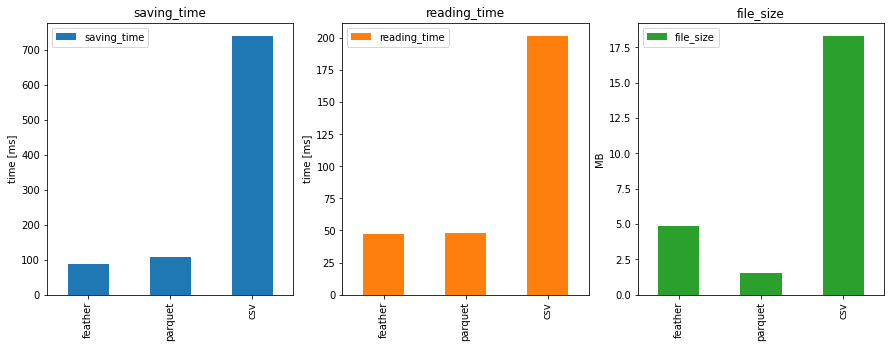

In [305]:
df = pd.DataFrame(results)
df['saving_time'] = df['saving_time']* 1000
df['reading_time'] = df['reading_time']* 1000
df['file_size'] = df['file_size']/ 1000000

axs = df.plot.bar(subplots = True, layout=(1,3), figsize = (15,5))
axs[0][0].set_ylabel('time [ms]')
axs[0][1].set_ylabel('time [ms]')
axs[0][2].set_ylabel('MB');

Conclusion: Feather and Parquet perform much better than CVS files for saving and reading time. While Parquet has a slighly worse saving and reading performance, Parquet is prefered because the resulting file size in 66% smaller than the Feather format. 

### Saving one month of data

In [186]:
big_df = big_df.reset_index(drop = True)

In [189]:
%%time
big_df.to_parquet('2017_03.parquet')

CPU times: user 50.6 s, sys: 35.8 s, total: 1min 26s
Wall time: 2min 1s


In [6]:
file_size = os.path.getsize('2017_03.parquet')
print ("File size: {:.2f} GB".format(file_size/1000000000))

File size: 1.08 GB


In [2]:
df = pd.read_parquet('2017_03.parquet')

In [6]:
df['Tipo de Tarjeta'].unique()

array(['tullave Básica', 'tullave Plus', 'Angelcom'], dtype=object)

In [9]:
df['Nombre de Perfil'].unique()

array(['(001) Anonymous', '(006) Apoyo Ciudadano', '(001) Adulto',
       '(014) Usuario frecuente', '(002) Adulto Mayor',
       '(018) Universitaria', '(030) Capital monedero',
       '(025) Empresarial Compensar', '(005) Discapacidad',
       '(024) Empresarial Colsubsidio',
       '(029) Empresarial Banco de Bogotá',
       '(023) Empresarial Davivienda', '(026) Empresarial AV Villas',
       '(017) Discapacitado Monedero', '(021) Tarjeta Ciudadana',
       '(036) Empresarial Colpatria', '(027) Club Universitario',
       '(044) Empresarial CIS', '(035) Empresarial AV Villas Crédito',
       '(003) Estudiantil', '(041) Empresarial Cercanos',
       '(006) Discapacitados', '(008) Étnico',
       '(032) Empresarial Daviplata', '(022) Empresarial TM',
       '(033) Empresarial People Pass'], dtype=object)

## Saving all months results

In [ ]:
path = '../../raw_data/2017_03_ValTroncal Mar2017'

In [ ]:
def read_month(path):
    
    cols = ['Fecha de Transaccion','Emisor','Estacion',
       'Acceso de Estación', 'Dispositivo', 'Tipo de Tarjeta',
       'Nombre de Perfil', 'Numero de Tarjeta', 'Tipo de Tarifa',
       'Saldo Previo a Transaccion', 'Valor', 'Saldo Despues de Transaccion']

    cols_1 = ['Fecha de Uso', 'Emisor', 'Estación',
           'Acceso de Estación', 'Dispositivo', 'Tipo de Tarjeta',
           'Nombre de Perfil', 'Número de Tarjeta', 'Tipo de Tarifa',
           'Saldo Previo a Transacción', 'Valor', 'Saldo Después de Transacción']
    
    dfs = []
    for i in os.listdir(path):
        try:
            df = pd.read_csv(os.path.join(path,i), delimiter = ";")
            fecha_transaction = df['Fecha de Transaccion'].astype(str)
            df['Fecha de Transaccion'] = pd.to_datetime(fecha_transaction, 
                                                        format= '%Y%m%d%H%M%S')
            dfs.append(df[cols])

        except IsADirectoryError:
            for j in os.listdir(os.path.join(path,i)):
                df = pd.read_csv(os.path.join(path, i,j), 
                                 delimiter = ',')

                df = df[cols_1]
                df.columns = cols
                fecha_transaction = df['Fecha de Transaccion'].astype(str)
                df['Fecha de Transaccion'] = pd.to_datetime(fecha_transaction, 
                                                            format= '%d-%m-%Y %H:%M:%S')
                dfs.append(df)
    

In [4]:
rawdata_path = '/Users/juandavidcaicedocastro/raw_data/'

In [31]:
from xlsx2csv import Xlsx2csv

In [32]:
%%time
Xlsx2csv(abril_path, outputencoding="utf-8").convert("myfile.csv")
df_1 = pd.read_csv("myfile.csv")

CPU times: user 1min 57s, sys: 4.99 s, total: 2min 2s
Wall time: 2min 13s


In [33]:
%%time
df_2 = pd.read_excel('../data/' + 'ValTroncal Abril  14 de 2017export.xlsx')

/Users/juandavidcaicedocastro/anaconda3/envs/irregular/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


CPU times: user 3min 50s, sys: 14.7 s, total: 4min 4s
Wall time: 4min 14s


Transforming to CSV first is more efficient than reading excel files directly from excel.